In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('F:/Data_Trained/Flip robo/CardiovascularDiseaseDetection(1)/cardio_train.csv',sep=';')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [11]:
df['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [4]:
df['age']=round(df['age']/365,0)

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,62.0,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.0,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.0,1,165,70.0,120,80,1,1,0,0,1,0
3,991,40.0,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.0,1,155,62.0,120,80,1,1,0,0,1,0


In [12]:
df.shape

(69301, 13)

In [13]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,53.338177,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.765427,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


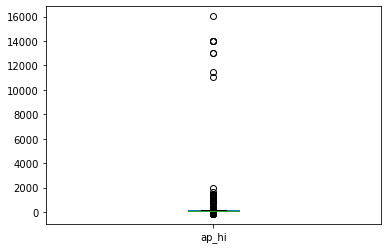

In [9]:
#Univariate analysis
df['ap_hi'].plot.box() # it has outliers

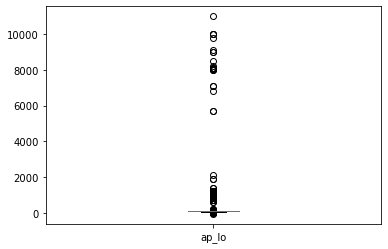

In [10]:
df['ap_lo'].plot.box()

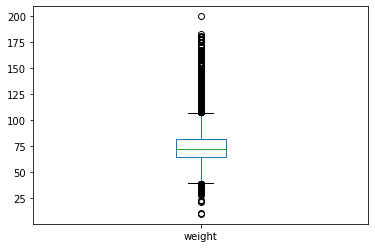

In [11]:
df['weight'].plot.box()

In [12]:
# based on univariate analysis there are outliers in the few columns

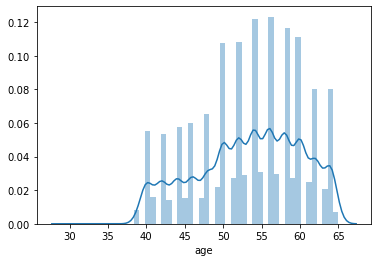

In [13]:
sns.distplot(df['age'])

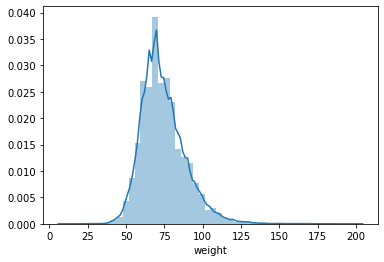

In [14]:
sns.distplot(df['weight'])

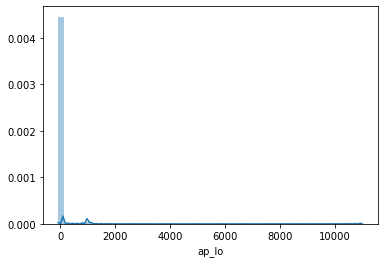

In [15]:
sns.distplot(df['ap_lo'])

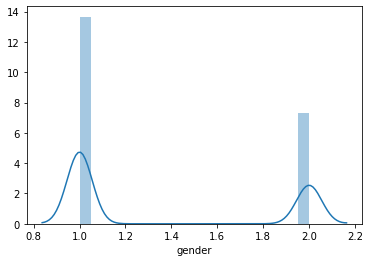

In [16]:
sns.distplot(df['gender'])

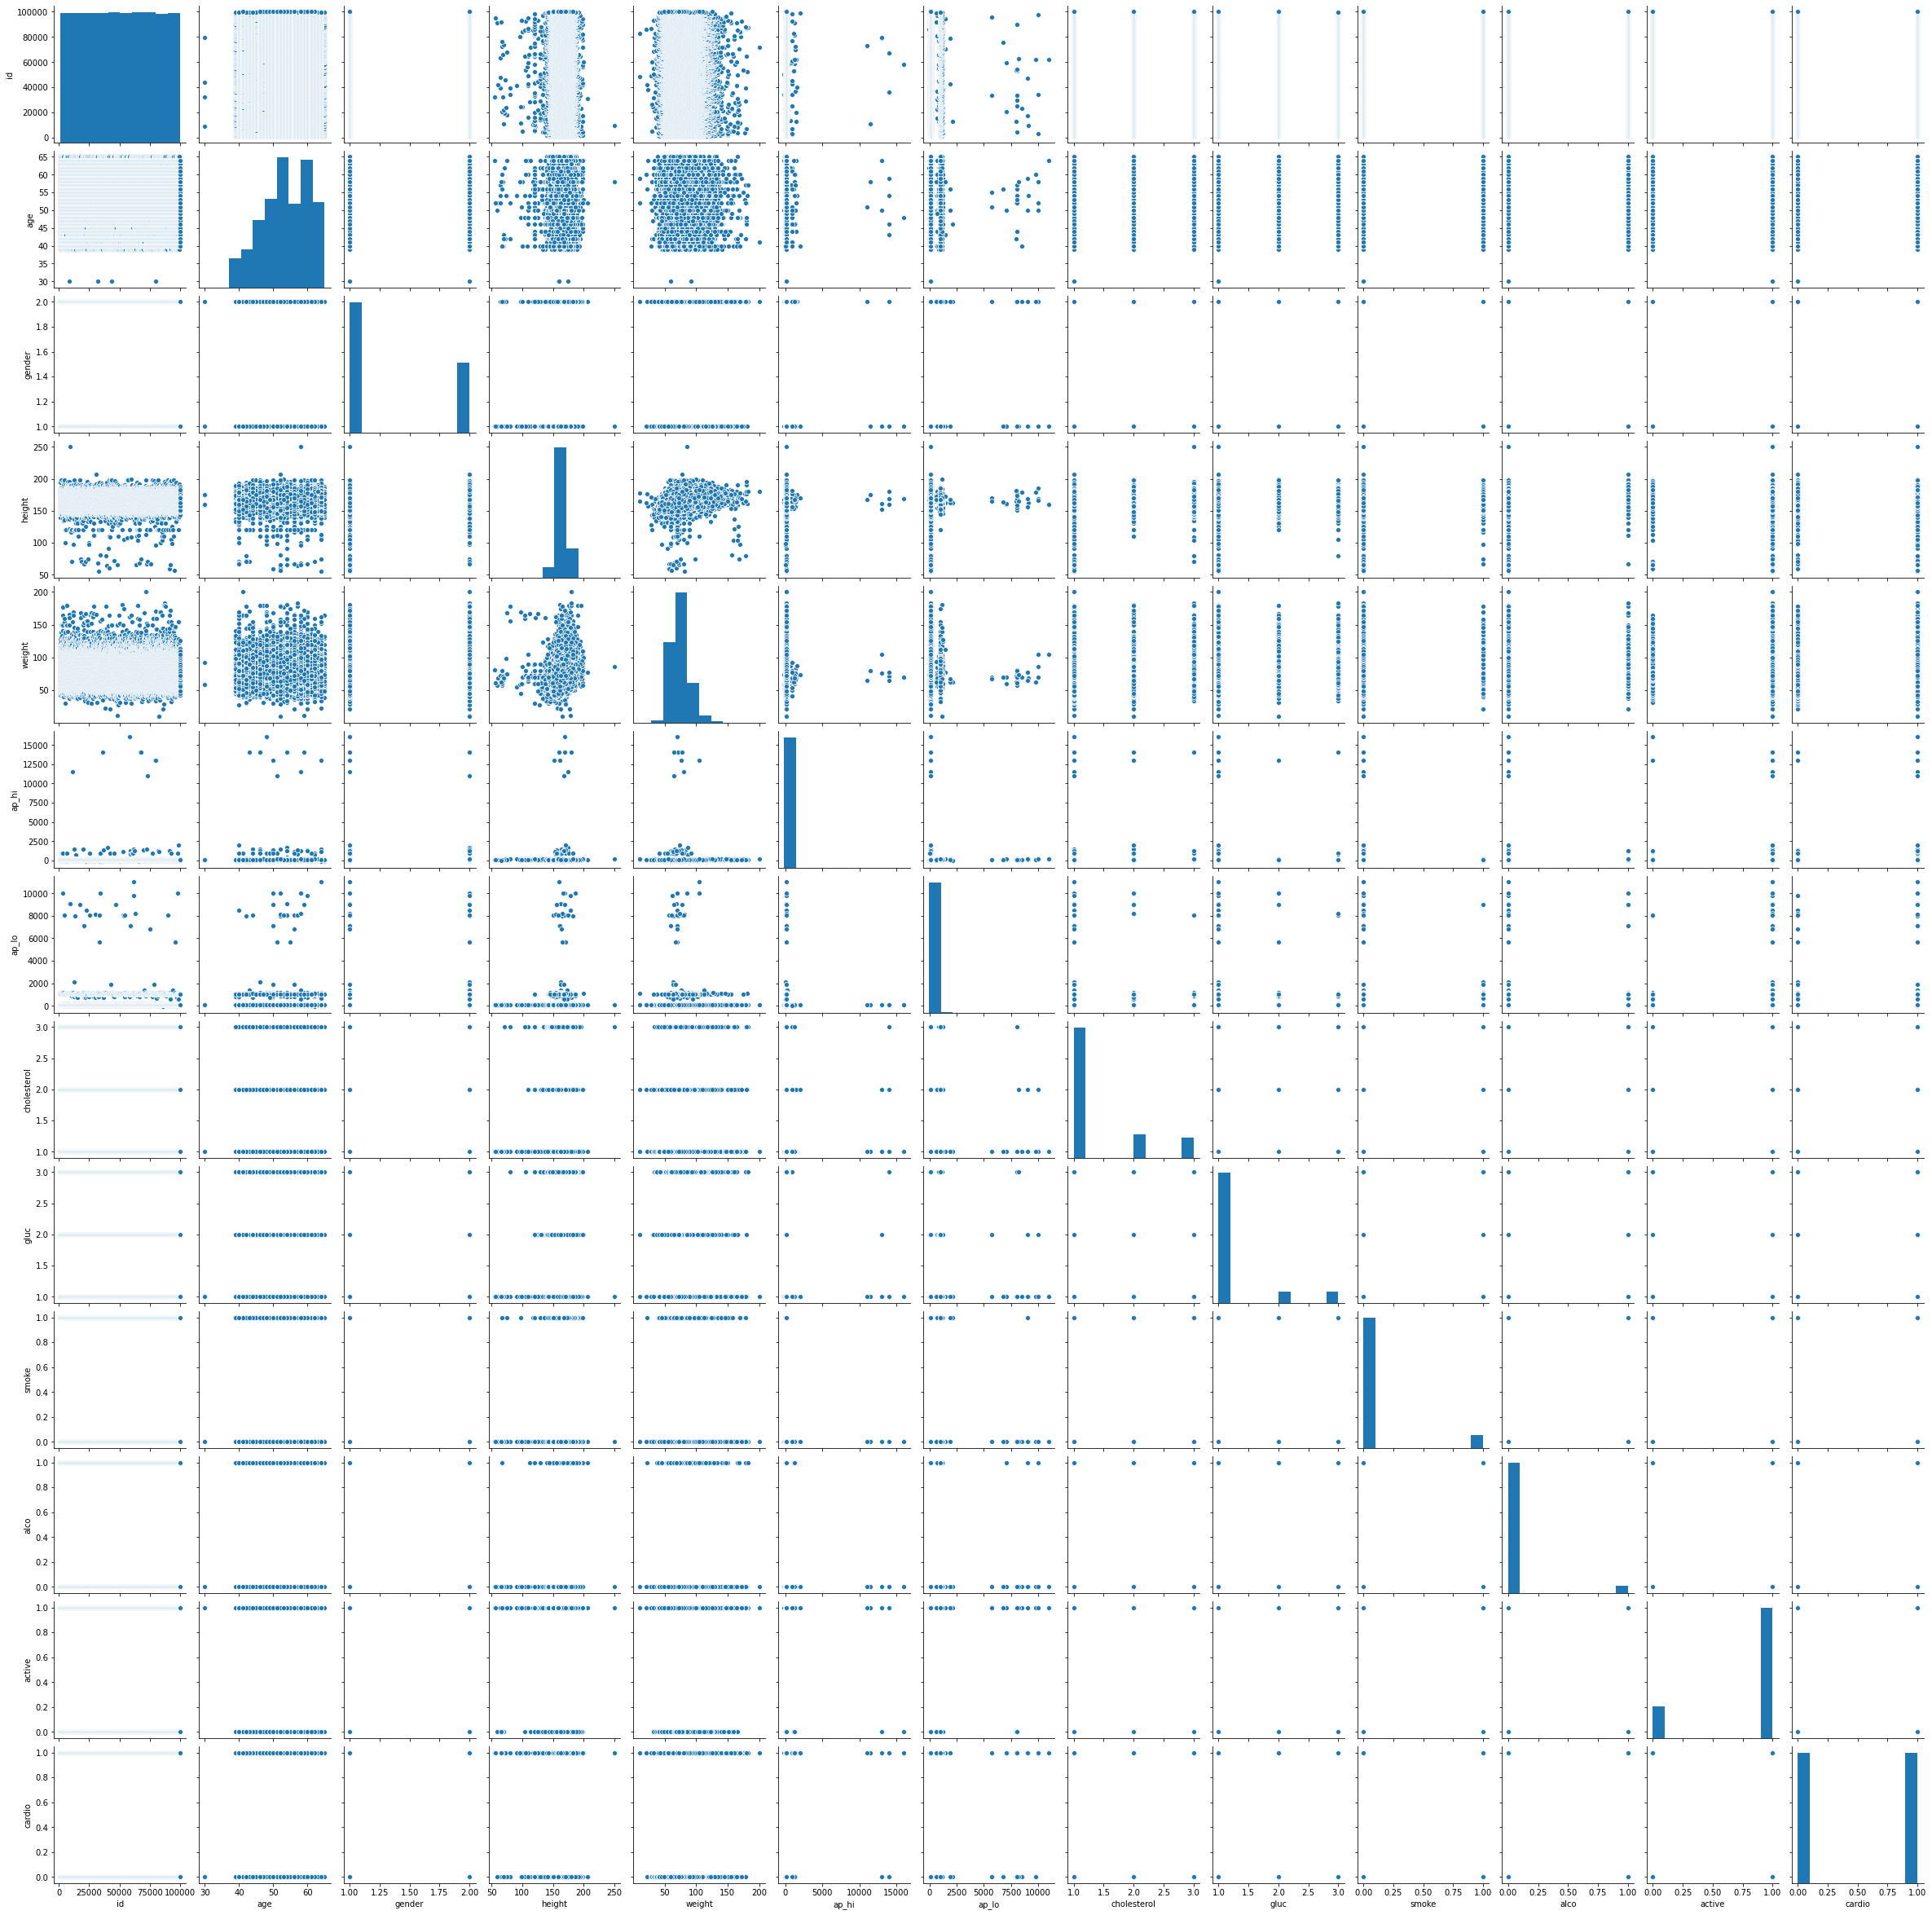

In [17]:
# Bivariate Analysis
sns.pairplot(df)

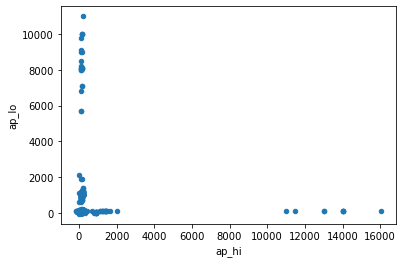

In [18]:
df.plot.scatter('ap_hi','ap_lo')

In [30]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [31]:
df=df.drop(columns='id')

In [32]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [33]:
# Using z score method to remove outlier
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

In [47]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225
alco,-0.029435,0.171015,0.094164,0.067259,0.001385,0.010764,0.036015,0.011442,0.339709,1.000000,0.025745,-0.007217


In [34]:
df.shape,df1.shape

((69301, 12), (55140, 12))

In [35]:
# lets separate target
df1_x=df1.drop(columns='cardio')
y=df1['cardio']

In [36]:
df1_x.shape,y.shape

((55140, 11), (55140,))

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df1_x)
x=pd.DataFrame(x,columns=df1_x.columns)

In [38]:
x.shape

(55140, 11)

In [39]:
x.shape,y.shape

((55140, 11), (55140,))

In [40]:
# Its Classification case

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report


In [42]:
# Finding Best model
lg=LogisticRegression()
max_accuracy_score=0

In [43]:
from sklearn.model_selection import train_test_split
# Finding best r_state
def maxr2_score(lg,x,y):
    max_accuracy_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
        lg.fit(x_train,y_train)
        pred=lg.predict(x_test)
        ac_scr=accuracy_score(y_test,pred)
        print('accuracy score corresponding to random state',r_state," is ",ac_scr)
        if ac_scr>max_accuracy_score:
            max_accuracy_score=ac_scr
            final_r_state=r_state
    print('max accuracy score corresponding to ', final_r_state," is ",max_accuracy_score)
    return final_r_state

In [44]:
# Lets use LogisticRegression
r_state=maxr2_score(lg,x,y)

accuracy score corresponding to random state 42  is  0.72506347479144
accuracy score corresponding to random state 43  is  0.7244287268770403
accuracy score corresponding to random state 44  is  0.7259702575262967
accuracy score corresponding to random state 45  is  0.7281465360899528
accuracy score corresponding to random state 46  is  0.7217083786724701
accuracy score corresponding to random state 47  is  0.7256982227058397
accuracy score corresponding to random state 48  is  0.7249727965179543
accuracy score corresponding to random state 49  is  0.7185346391004716
accuracy score corresponding to random state 50  is  0.7288719622778382
accuracy score corresponding to random state 51  is  0.7225244831338411
accuracy score corresponding to random state 52  is  0.7267863619876678
accuracy score corresponding to random state 53  is  0.7233405875952121
accuracy score corresponding to random state 54  is  0.7182626042800145
accuracy score corresponding to random state 55  is  0.73141095393

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gcr=GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)
r_state=maxr2_score(gcr,x,y)

accuracy score corresponding to random state 42  is  0.7275117881755532
accuracy score corresponding to random state 43  is  0.7318643453028655
accuracy score corresponding to random state 44  is  0.7275117881755532
accuracy score corresponding to random state 45  is  0.7282372143634385
accuracy score corresponding to random state 46  is  0.7202575262966993
accuracy score corresponding to random state 47  is  0.7181719260065288
accuracy score corresponding to random state 48  is  0.7224338048603555
accuracy score corresponding to random state 49  is  0.7189880304678999
accuracy score corresponding to random state 50  is  0.7288719622778382
accuracy score corresponding to random state 51  is  0.725335509611897
accuracy score corresponding to random state 52  is  0.725607544432354
accuracy score corresponding to random state 53  is  0.7222524483133841
accuracy score corresponding to random state 54  is  0.7223431265868698
accuracy score corresponding to random state 55  is  0.72705839680

In [32]:
# Use adaboost
SV=SVC()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_cls=AdaBoostClassifier(base_estimator=DT,learning_rate=0.001,n_estimators=500)
r_state=maxr2_score(ada_cls,x,y)

accuracy score corresponding to random state 42  is  0.6264055132390279
accuracy score corresponding to random state 43  is  0.6311207834602829
accuracy score corresponding to random state 44  is  0.627493652520856
accuracy score corresponding to random state 45  is  0.6317555313746827
accuracy score corresponding to random state 46  is  0.6321182444686253
accuracy score corresponding to random state 47  is  0.6207834602829162
accuracy score corresponding to random state 48  is  0.6305767138193689
accuracy score corresponding to random state 49  is  0.6348385926731955
accuracy score corresponding to random state 50  is  0.6286724700761698
accuracy score corresponding to random state 51  is  0.6342038447587958
accuracy score corresponding to random state 52  is  0.6276750090678274
accuracy score corresponding to random state 53  is  0.6322089227421109
accuracy score corresponding to random state 54  is  0.6264961915125136
accuracy score corresponding to random state 55  is  0.6311207834

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_leaf=4,max_depth=5,
                          max_features='auto',bootstrap=True,min_samples_split=5)
r_state=maxr2_score(rf1,x,y)


accuracy score corresponding to random state 42  is  0.7285092491838956
accuracy score corresponding to random state 43  is  0.7294160319187523
accuracy score corresponding to random state 44  is  0.7295067101922379
accuracy score corresponding to random state 45  is  0.7295067101922379
accuracy score corresponding to random state 46  is  0.720892274211099
accuracy score corresponding to random state 47  is  0.7187159956474428
accuracy score corresponding to random state 48  is  0.7238846572361263
accuracy score corresponding to random state 49  is  0.7210736307580704
accuracy score corresponding to random state 50  is  0.7309575625680087
accuracy score corresponding to random state 51  is  0.7263329706202394
accuracy score corresponding to random state 52  is  0.7276931447225244
accuracy score corresponding to random state 53  is  0.7230685527747551
accuracy score corresponding to random state 54  is  0.7228871962277839
accuracy score corresponding to random state 55  is  0.7309575625

In [62]:
# Lets use KNN Classifier model
knr=KNeighborsClassifier(n_neighbors=6)
r_state=maxr2_score(knr,x,y)

accuracy score corresponding to random state 42  is  0.7093761334784185
accuracy score corresponding to random state 43  is  0.7138193688792165
accuracy score corresponding to random state 44  is  0.7015778019586507
accuracy score corresponding to random state 45  is  0.7090134203844759
accuracy score corresponding to random state 46  is  0.7034820457018498
accuracy score corresponding to random state 47  is  0.7000362713093943
accuracy score corresponding to random state 48  is  0.7052956111715633
accuracy score corresponding to random state 49  is  0.704842219804135
accuracy score corresponding to random state 50  is  0.710645629307218
accuracy score corresponding to random state 51  is  0.7061117156329344
accuracy score corresponding to random state 52  is  0.711733768589046
accuracy score corresponding to random state 53  is  0.7006710192237939
accuracy score corresponding to random state 54  is  0.69677185346391
accuracy score corresponding to random state 55  is  0.70865070729053

In [50]:
# best score by random classifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=75)
rf1=RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_leaf=4,max_depth=5,
                          max_features='auto',bootstrap=True,min_samples_split=5)
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
ac_scr=accuracy_score(y_test,pred)
print('accuracy score is',ac_scr)



accuracy score is 0.735310119695321


In [53]:
import joblib

In [54]:

joblib.dump(rf1,"heart_disease_prdict.pkl")

['heart_disease_prdict.pkl']

In [55]:
a=[pred,y_test]

In [56]:
a

[array([1, 0, 0, ..., 0, 1, 1], dtype=int64),
 54643    1
 21037    1
 55736    1
 31527    1
 55101    0
         ..
 37481    0
 66760    1
 51171    1
 64859    1
 51562    1
 Name: cardio, Length: 11028, dtype: int64]